In [1]:
import pandas as pd
import os
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import numpy as np

In [2]:
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 10)

In [3]:
os.chdir(r"C:\Users\jadel\Documents\OpenClassrooms\Projet 2")

In [4]:
#chargement du fichier csv cleané dans le notebook précédent
df = pd.read_csv("openfoodfacts_clean.csv", sep = ',')

C:\Users\jadel\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (0) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [5]:
df.head()

,code,product_name,countries,nutriscore_grade,category_1,category_2,energy-kcal_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,proteins_100g,salt_100g
0,0000000000949,Salade de carottes râpées,France,b,Composite foods,One-dish meals,32.0,0.3,0.1,5.3,3.9,0.9,0.42
1,0000000001281,Tarte noix de coco,France,d,Sugary snacks,Biscuits and cakes,381.0,22.0,15.5,27.3,21.9,4.6,0.10
2,0000000001885,Compote de poire,France,a,Fruits and vegetables,Fruits,157.0,0.0,0.0,36.0,27.0,0.6,0.00
3,0000000002257,Salade de macedoine de légumes,France,b,Composite foods,One-dish meals,143.0,12.7,1.0,3.9,1.0,1.9,0.27
4,0000000005005,Abondance,France,d,Milk and dairy products,Cheese,397.0,33.0,21.6,0.1,0.1,25.0,1.30


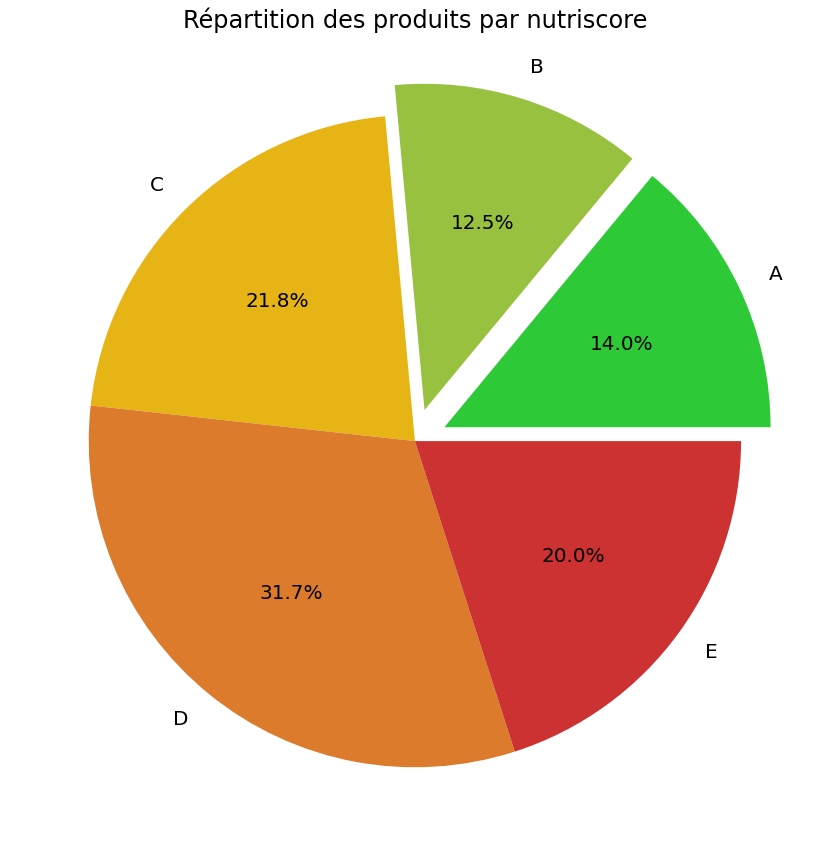

In [6]:
#analyse univariée du nutriscore
plt.figure(figsize = (15,15))
plt.rcParams['font.size'] = '20'
plt.pie(df['nutriscore_grade'].value_counts().sort_index(),
        explode = [.1,.1,0,0,0],
        labels = [score.upper() for score in sorted(df['nutriscore_grade'].unique())],
        colors = [ '#2dc937','#99c140','#e7b416', '#db7b2b', '#cc3232'],
       autopct = lambda x: str(round(x, 1)) + '%')
plt.title('Répartition des produits par nutriscore');

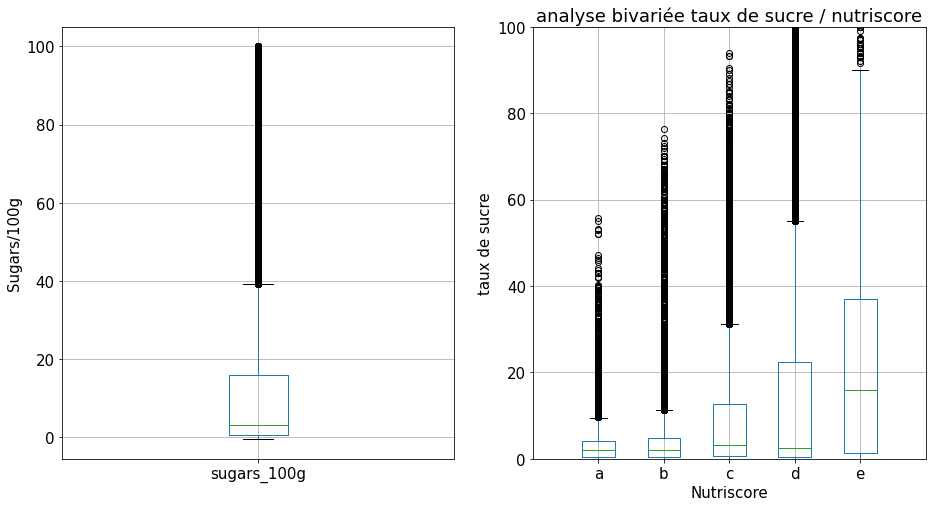

In [7]:
#analyse univariée des taux de sucre
plt.rcParams['font.size'] = '15'
fig, axes = plt.subplots(1, 2, figsize = (15,8))
df.boxplot('sugars_100g', ax = axes[0])
plt.axis([0,2,0,30])
plt.ylabel('taux de sucre');

#analyse bivariée taux de sucre / nutriscore
df.boxplot(column = 'sugars_100g', by = 'nutriscore_grade', ax = axes[1])
axes[1].set_xlabel('Nutriscore')
axes[0].set_ylabel('Sugars/100g')
plt.title('analyse bivariée taux de sucre / nutriscore')
plt.suptitle('')
plt.axis([0,6,0,100]);

In [8]:
import statsmodels.api

#test ANOVA sur analyse bivariée taux de sucre / nutriscore

result = statsmodels.formula.api.ols('sugars_100g ~ nutriscore_grade', data=df).fit()
table = statsmodels.api.stats.anova_lm(result)

table
#la p-value (PR(>F)) est inférieur à 5% donc on rejette l'hypothèse d'absence de différence de taux de sucre entre les nutriscores.

,df,sum_sq,mean_sq,F,PR(>F)
nutriscore_grade,4.0,9.244368e+06,2.311092e+06,7723.198311,0.0
Residual,250206.0,7.487172e+07,2.992403e+02,NaN,NaN


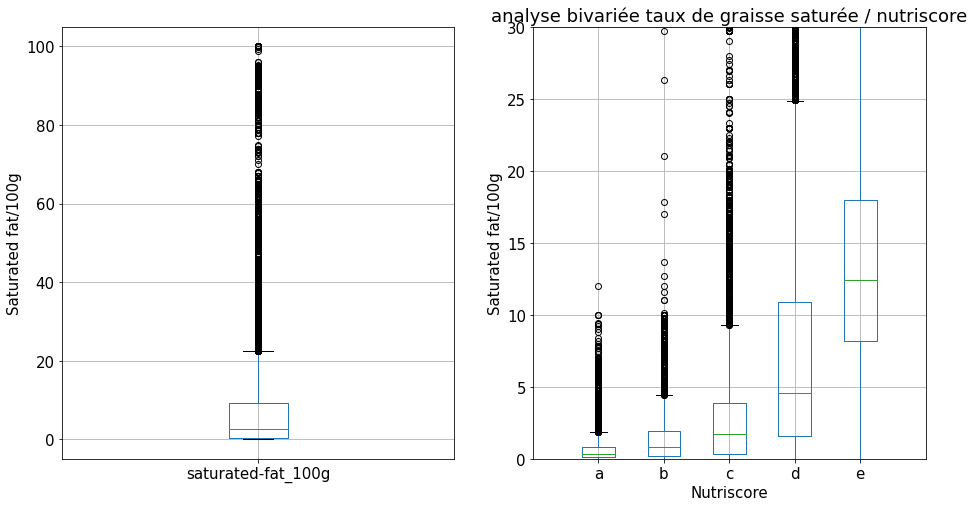

In [9]:
#analyse univariée du taux de graisses saturées
fig, axes = plt.subplots(1, 2, figsize = (15,8))
plt.rcParams['font.size'] = '15'
df.boxplot(['saturated-fat_100g'], ax = axes[0])
plt.axis([0,2,0,40])
axes[0].set_ylabel('Saturated fat/100g');

#analyse bivariée du taux de graisses saturées / nutriscore
df.boxplot(column = 'saturated-fat_100g', by = 'nutriscore_grade', ax = axes[1])
axes[1].set_xlabel('Nutriscore')
axes[1].set_ylabel('Saturated fat/100g')
plt.title('analyse bivariée taux de graisse saturée / nutriscore')
plt.suptitle('')
plt.axis([0,6,0,30]);

In [10]:
#test ANOVA sur analyse bivariée taux de graisses saturées / nutriscore
result = statsmodels.formula.api.ols("Q('saturated-fat_100g') ~ nutriscore_grade", data=df).fit()
table = statsmodels.api.stats.anova_lm(result)

table
#la p-value (PR(>F)) est inférieur à 5% donc on rejette l'hypothèse d'absence de différence
#de taux de graisses saturées entre les nutriscores.

,df,sum_sq,mean_sq,F,PR(>F)
nutriscore_grade,4.0,5.643168e+06,1.410792e+06,25305.588435,0.0
Residual,250206.0,1.394904e+07,5.575022e+01,NaN,NaN


''

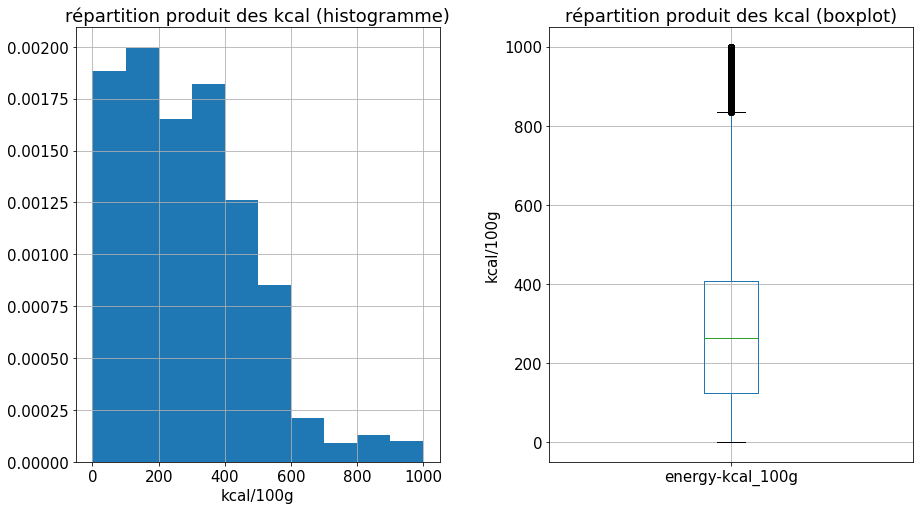

In [11]:
#analyse univariée du taux calorique
fig, axes = plt.subplots(1, 2, figsize = (15,8))
plt.rcParams['font.size'] = '15'
df.hist('energy-kcal_100g', range = (0,1000), bins = 10, density = True, ax = axes[0])
axes[0].set_xlabel('kcal/100g')
axes[0].set_title('répartition produit des kcal (histogramme)')

df.boxplot('energy-kcal_100g',ax = axes[1])
axes[1].set_ylabel('kcal/100g')
axes[1].set_title('répartition produit des kcal (boxplot)')
;

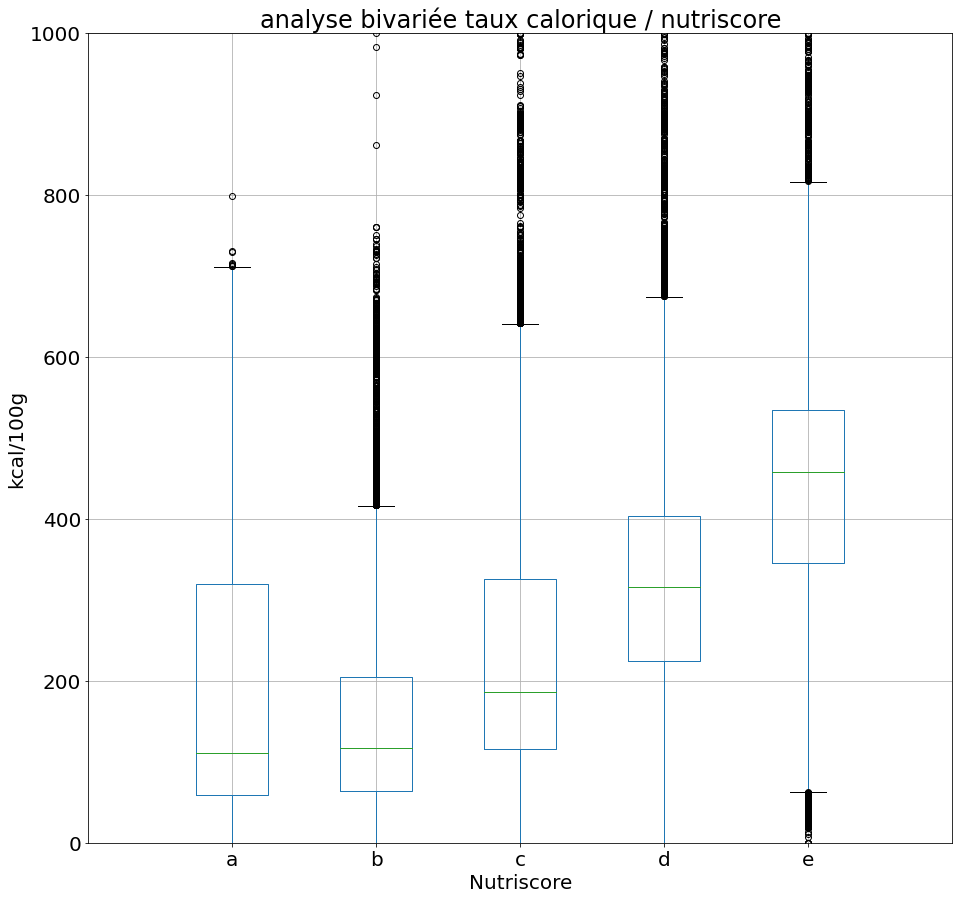

In [12]:
#analyse bivariée entre le taux calorique et le nutriscore
plt.rcParams['font.size'] = '20'
df.boxplot(column = 'energy-kcal_100g', by = 'nutriscore_grade', figsize = (15,15))
plt.xlabel('Nutriscore')
plt.ylabel('kcal/100g')
plt.title('analyse bivariée taux calorique / nutriscore')
plt.suptitle('')
plt.axis([0,6,0,1000]);

In [13]:
#test ANOVA de l'analyse bivariée entre le taux calorique et le nutriscore
result = statsmodels.formula.api.ols("Q('energy-kcal_100g') ~ nutriscore_grade", data=df).fit()
table = statsmodels.api.stats.anova_lm(result)

table
#la p-value (PR(>F)) est inférieur à 5% donc on rejette l'hypothèse d'absence de différence
#de taux calorique entre les nutriscores.

,df,sum_sq,mean_sq,F,PR(>F)
nutriscore_grade,4.0,2.132361e+09,5.330903e+08,18587.457129,0.0
Residual,250206.0,7.175935e+09,2.868011e+04,NaN,NaN


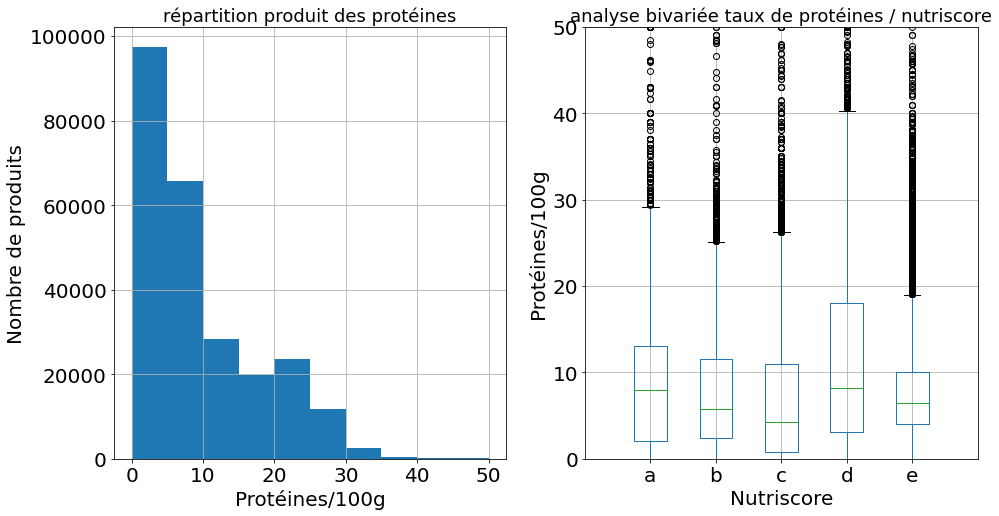

In [14]:
#analyse univariée du taux de protéines
fig, axes = plt.subplots(1, 2, figsize = (15,8))
plt.rcParams['font.size'] = '15'
df.hist('proteins_100g', range=(0,50), bins = 10, ax = axes[0])
axes[0].set_xlabel('Protéines/100g')
axes[0].set_ylabel('Nombre de produits')
axes[0].set_title('répartition produit des protéines')

#analyse bivariée du taux de protéines / nutriscore
df.boxplot(column = 'proteins_100g', by = 'nutriscore_grade', ax = axes[1])
axes[1].set_xlabel('Nutriscore')
axes[1].set_ylabel('Protéines/100g')
axes[1].set_title('analyse bivariée taux de protéines / nutriscore')
plt.suptitle('')
plt.axis([0,6,0,50]);

In [15]:
#test ANOVA de l'analyse bivariée entre taux de protéines et nutriscore
result = statsmodels.formula.api.ols('proteins_100g ~ nutriscore_grade', data=df).fit()
table = statsmodels.api.stats.anova_lm(result)

table
#la p-value (PR(>F)) est inférieur à 5% donc on rejette l'hypothèse d'absence de différence
#de taux de protéines entre les nutriscores.#les produits les plus protéinés en moyenne appartiennet à aux catégories A, D et E.
#Cependant il y a de grandes disparités au sein même des scores.
#Il faudra essayer de choisir le plus possible des produits de la catégorie A.

,df,sum_sq,mean_sq,F,PR(>F)
nutriscore_grade,4.0,5.363020e+05,134075.500271,1906.353428,0.0
Residual,250206.0,1.759721e+07,70.330873,NaN,NaN


''

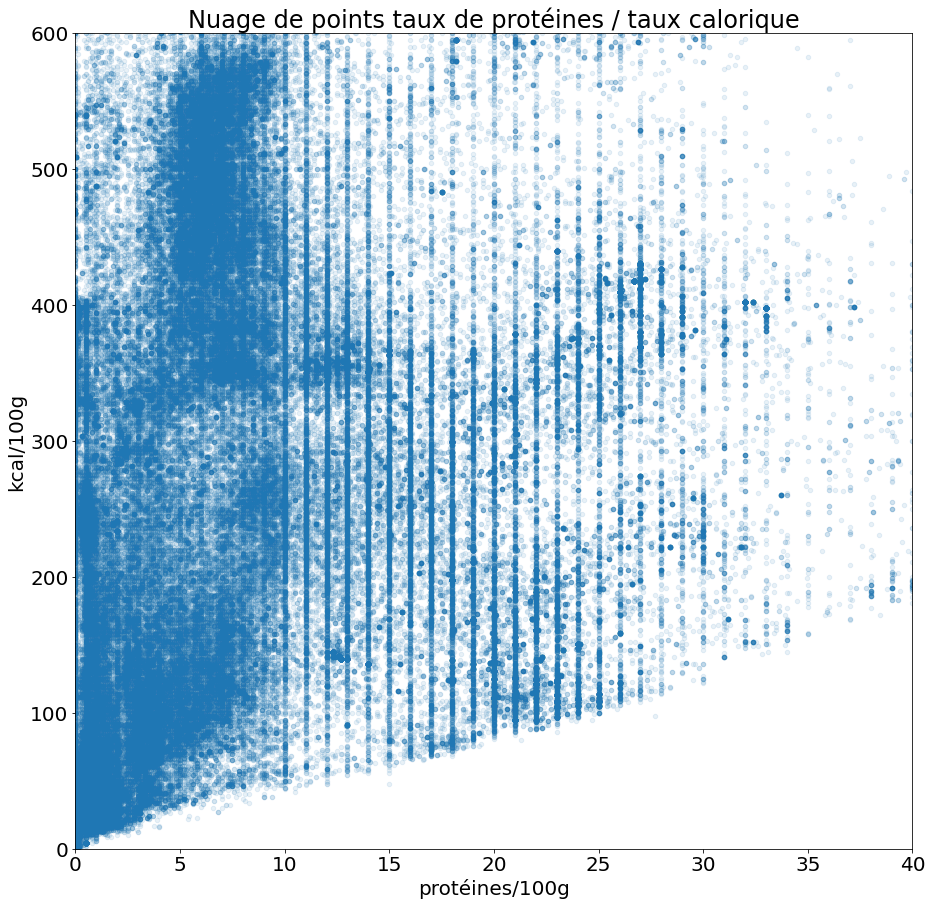

In [16]:
#analyse bivariée du taux de protéines et taux calorique en nuage de points 
plt.rcParams['font.size'] = '20'
df.plot(kind='scatter', x='proteins_100g', y='energy-kcal_100g', alpha=0.1, figsize = (15,15))
plt.axis([0,40,0,600])
plt.xlabel('protéines/100g')
plt.ylabel('kcal/100g')
plt.title('Nuage de points taux de protéines / taux calorique')
;
#la partie basse du graphique est celle avec les produits les plus intéréssants

In [17]:
#test Pearson de la corrélation entre taux de protéines et taux caloriques

from scipy.stats import pearsonr

pd.DataFrame(pearsonr(df['proteins_100g'], df['energy-kcal_100g']), index=['pearson_coeff','p-value'], columns=['resultat_test'])
#le coefficient de corrélation est très faible et la p-value nulle, donc les protéines et kilocalories sont peu corrélées.

,resultat_test
pearson_coeff,0.104104
p-value,0.000000


In [18]:
#création d'une nouvelle variable taux de protéines par kcal. Ce taux est particulièrement intéréssant pour les sportifs.
df['kcal/protein'] = (df['energy-kcal_100g']/df['proteins_100g']).round(2)

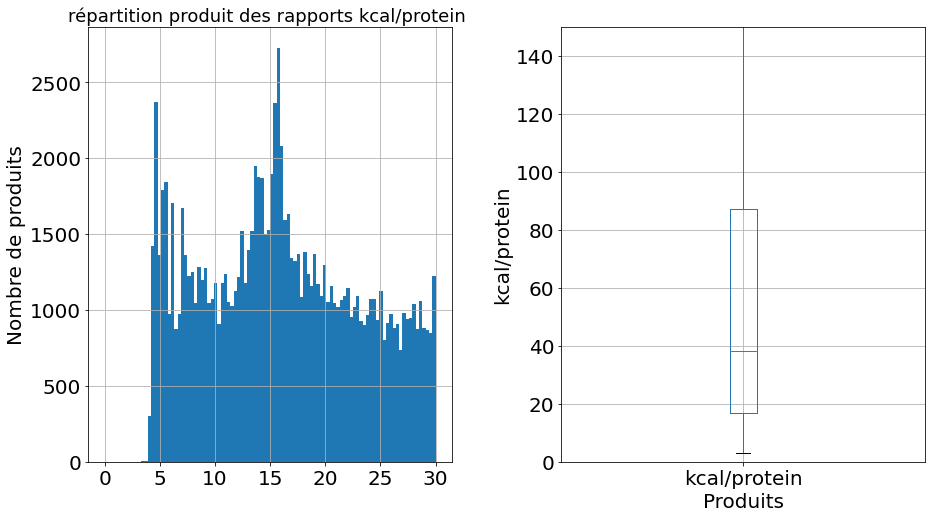

In [19]:
#analyse univariée du rapport protéines/cal 
fig, axes = plt.subplots(1, 2, figsize = (15,8))
plt.rcParams['font.size'] = '15'
df.hist('kcal/protein', range=(0,30), bins = 100, ax = axes[0])
axes[0].set_ylabel('Nombre de produits')
axes[0].set_title('répartition produit des rapports kcal/protein ')

df.boxplot('kcal/protein', ax = axes[1])
plt.axis([0,2,0,150])
axes[1].set_ylabel('kcal/protein')
axes[1].set_xlabel('Produits');

#les produits les plus à gauche sont les plus intéréssants

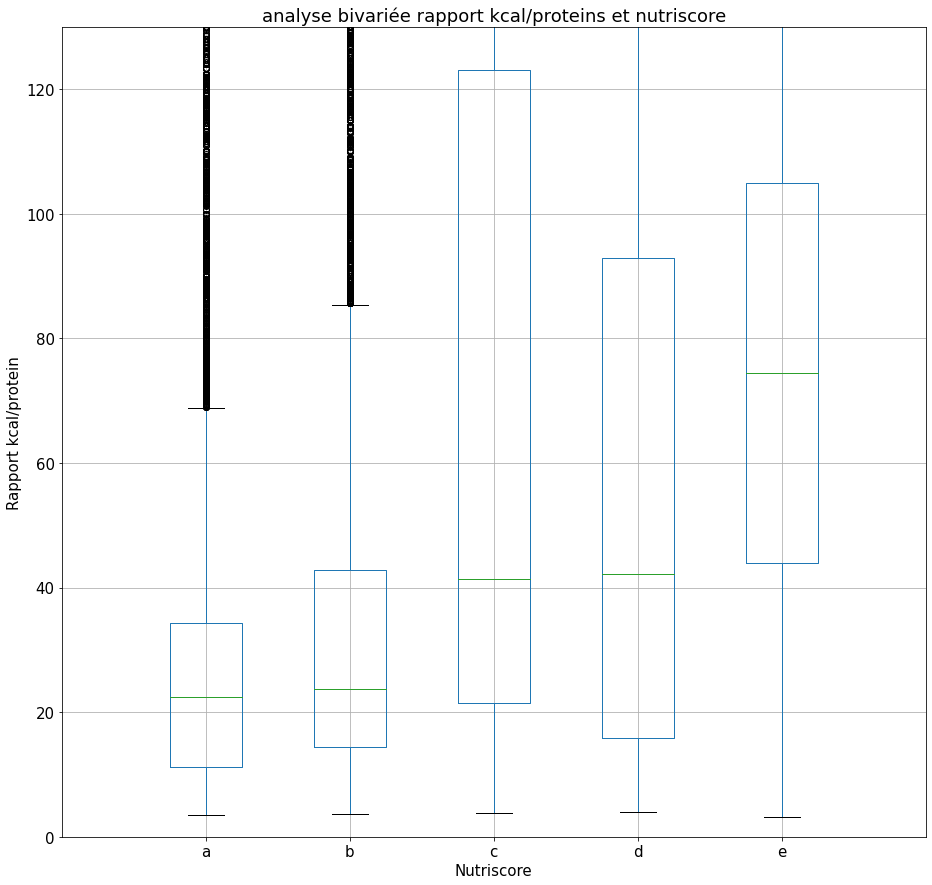

In [20]:
df.boxplot(column = 'kcal/protein', by = 'nutriscore_grade', figsize=(15,15))
plt.rcParams['font.size'] = '15'
plt.axis([0,6,0,130])
plt.xlabel('Nutriscore')
plt.ylabel('Rapport kcal/protein')
plt.title('analyse bivariée rapport kcal/proteins et nutriscore')
plt.suptitle('');
#grâce à cette nouvelle variable, nous avons pû extraire une nouvelle information :
#les produits les plus intéréssants pour les sportifs sont aussi ceux avec les meilleurs nutriscore.
#Les analyses bivariées précédentes n'ont pas pû extraire cette information

In [21]:
#test ANOVA de l'analyse entre le rapport protéine/calorie et le nutriscore
result = statsmodels.formula.api.ols("Q('kcal/protein') ~ nutriscore_grade", data=df[df['kcal/protein']<np.inf]).fit()
table = statsmodels.api.stats.anova_lm(result)

table
#la p-value (PR(>F)) est inférieur à 5% et F = 1 donc on garde l'hypothèse nulle d'absence de différence
#de rapport kcal/protéine entre les nutriscores.

,df,sum_sq,mean_sq,F,PR(>F)
nutriscore_grade,4.0,1.175063e+13,2.937657e+12,1.007865,0.401768
Residual,232791.0,6.785237e+17,2.914734e+12,NaN,NaN


In [22]:
#exemples de produits adaptés pour la seiche sportive et avec un bon nutriscore
print("Voici 5 exemples toutes catégories de produits adaptés à la sèche :\n\n",
      df[(df['kcal/protein']<6)&(df['nutriscore_grade'].str.contains('a|b'))
            &(df['proteins_100g']>4)][['code','product_name']].sample(5))

Voici 5 exemples toutes catégories de produits adaptés à la sèche :

                  code                                   product_name
168524  3700604200499                      Filets de thon au naturel
131282  3435660722097  Mes P'tites aiguillettes de poulet provençale
94995   3263859831813               Limande du Nord avec Eau Ajoutée
53189   3054470057009                          Thon blanc au naturel
34747   2424503022044                                Filet de poulet


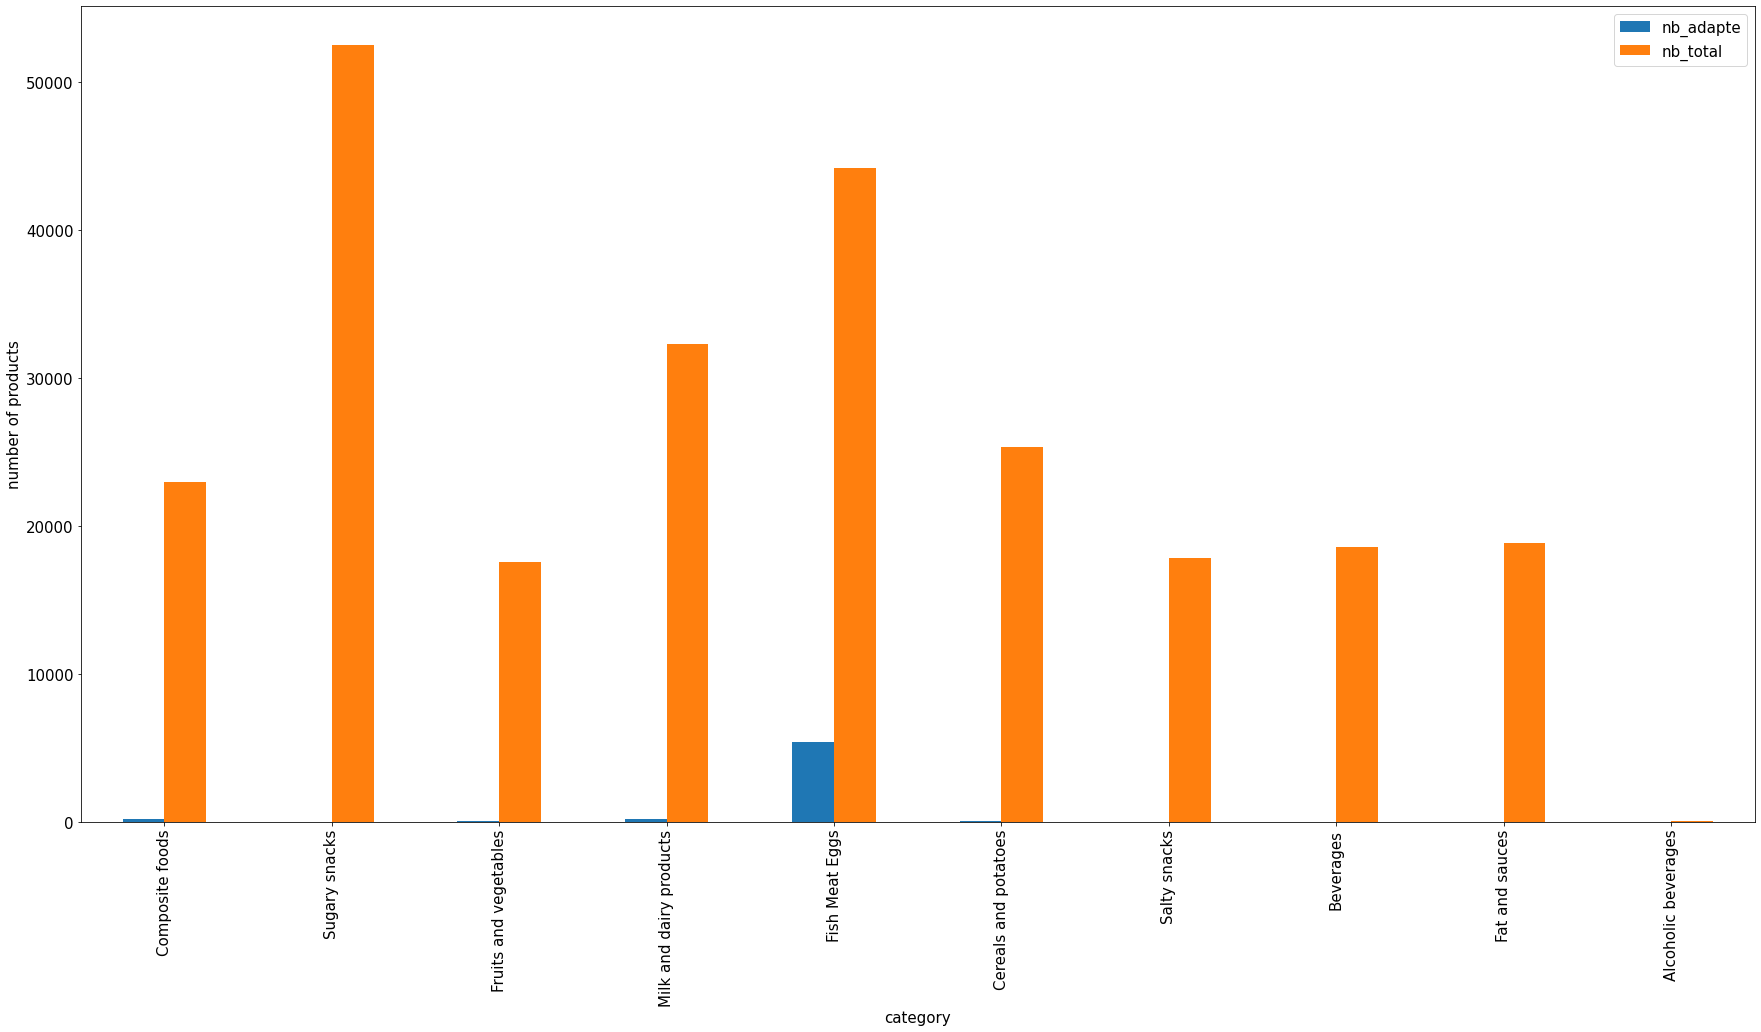

In [23]:
#création d'un dataframe pour un graphique de réalisation potentielle de l'application
liste_total = []
liste_adapte = []
liste_category = df['category_1'].unique()
for i in df['category_1'].unique():
    nb_total = df[df['category_1']==i].shape[0]
    nb_adapte = df[(df['kcal/protein']<6)&(df['nutriscore_grade'].str.contains('a|b'))
            &(df['proteins_100g']>1)&(df['category_1']==i)][['code','product_name']].shape[0]
    liste_total.append(nb_total)
    liste_adapte.append(nb_adapte)

res = [i / j for i, j in zip(liste_adapte, liste_total)]
df_1 = pd.DataFrame({'category' : liste_category,
                    'nb_adapte' : liste_adapte,
                    'nb_total' : liste_total})

df_1.plot.bar(x = 'category', y = ['nb_adapte', 'nb_total'], stacked = False, figsize = (30,15))
plt.ylabel('number of products');

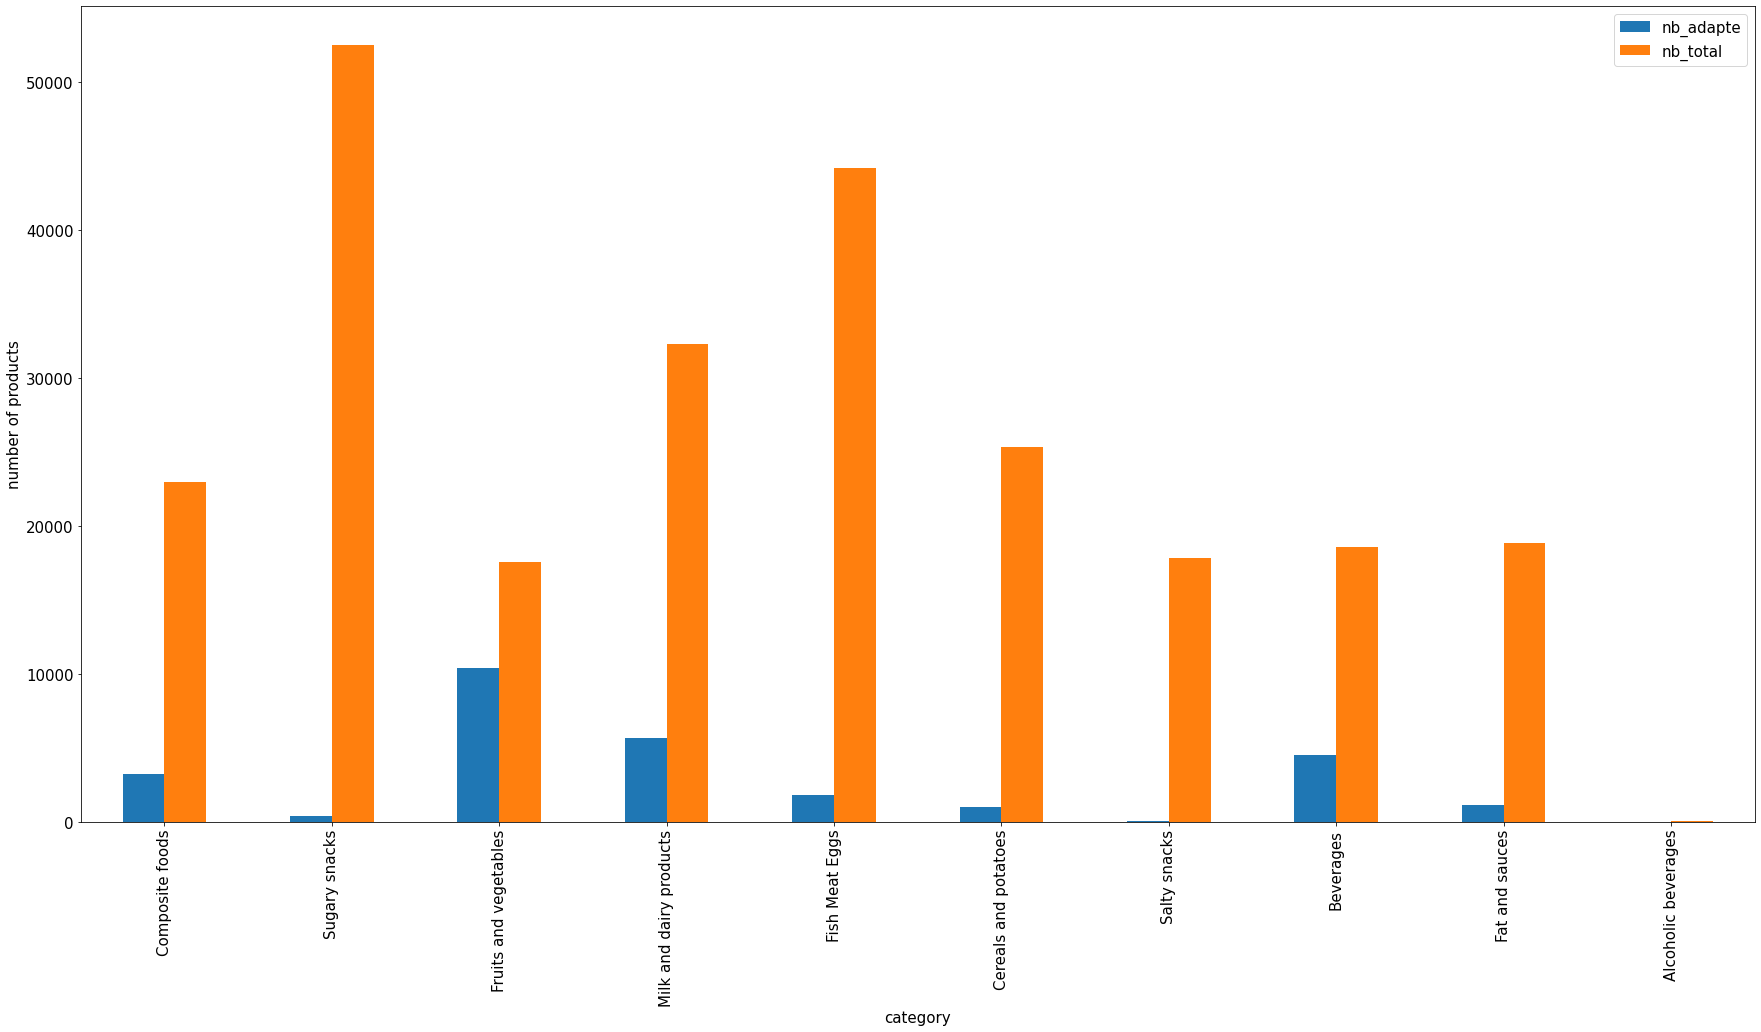

In [24]:
liste_total = []
liste_adapte = []
liste_category = df['category_1'].unique()
for i in df['category_1'].unique():
    nb_total = df[df['category_1']==i].shape[0]
    nb_adapte = df[(df['energy-kcal_100g']<100)&(df['nutriscore_grade'].str.contains('a|b'))
            &(df['category_1']==i)][['code','product_name']].shape[0]
    liste_total.append(nb_total)
    liste_adapte.append(nb_adapte)

res = [i / j for i, j in zip(liste_adapte, liste_total)]
df_2 = pd.DataFrame({'category' : liste_category,
                    'nb_adapte' : liste_adapte,
                    'nb_total' : liste_total})

df_2.plot.bar(x = 'category', y = ['nb_adapte', 'nb_total'], stacked = False, figsize = (30,15))
plt.ylabel('number of products');

In [25]:
print("Nombre de produits protéinés:", df_1['nb_adapte'].sum())

Nombre de produits protéinés: 5804


In [26]:
print("Nombre de produits légers:", df_2['nb_adapte'].sum())

Nombre de produits légers: 28076


In [27]:
df['code'] = df['code'].astype('str')

In [28]:
df.sample(20)

,code,product_name,countries,nutriscore_grade,category_1,category_2,energy-kcal_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,proteins_100g,salt_100g,kcal/protein
201049,5035139217628,Aloe Vera Goût Mangue,France,e,Beverages,Sweetened beverages,32.0,0.0,0.00,7.9,7.8,0.0,0.04,inf
60418,3165433630006,Daddy cote coeur roux petits sucres en morceaux,France,d,Sugary snacks,Sweets,400.0,0.0,0.00,100.0,100.0,0.0,0.00,inf
24570,20462567,Œufs croustillants,France,e,Sugary snacks,Sweets,514.0,27.0,17.00,59.0,44.0,7.2,0.56,71.39
153138,3580280775609,Les p'tites tartines pêche,France,c,Sugary snacks,Sweets,183.0,0.5,0.00,44.0,44.0,0.5,0.00,366.00
3765,66844370112,Lentilles Blondes,"Martinique, en:france",a,Cereals and potatoes,Legumes,352.0,1.1,0.15,63.4,2.0,24.6,0.02,14.31
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27083,20960520,Millefeuille,"Belgique, en:fr",d,Sugary snacks,Biscuits and cakes,293.0,13.0,7.50,39.0,24.0,3.5,0.48,83.71
98676,3269617106452,Terrine de lapin au romarin,France,e,Fish Meat Eggs,Processed meat,347.0,31.9,12.60,0.8,0.8,14.2,1.35,24.44
206167,5400313000974,Seitan,"Frankrijk, nl",d,Cereals and potatoes,Cereals,447.0,0.0,0.00,0.0,0.0,22.1,1.70,20.23
238307,8420696000122,TRONCAL huile d'olive extra,en:fr,c,Fat and sauces,Fats,900.0,100.0,13.00,0.0,0.0,0.0,0.00,inf


In [29]:
while True :
    code_produit = str(input("Veuillez entrer le code d'un produit que vous souhaitez consommer: ")).strip()
    if code_produit not in df['code'].values:
        print("Veuillez entrer une valeur valide.")
        continue
    else:
        produit = df[df['code']==code_produit]
        break

categorie_1 = produit['category_1'].item()
categorie_2 = produit['category_2'].item()    

print("Votre produit s'appelle : ", produit['product_name'].item())

if ((produit['kcal/protein'])<6).bool()&(produit['nutriscore_grade'].str.contains('a|b')).bool():
    print('Votre produit est tout à fait adapté pour un régime de sèche sportive')
elif (produit['energy-kcal_100g']<100).bool()&(produit['nutriscore_grade'].str.contains('a|b')).bool():
    print('Votre produit est de la catégorie :', categorie_2)
    print('Votre produit est peu calorique mais pas assez protéiné. Voici des produits équivalents plus protéinés')
    print(df[(df['kcal/protein']<6)&(df['nutriscore_grade'].str.contains('a|b'))&(df['category_2']==categorie_2)
             &(df['proteins_100g']>4)][['code','product_name']].sample(5, replace=True))
    print("\nSi ces produits ne vous plaisent pas, vous pouvez toujours consommer ces produits un peu différents mais tout aussi bien adaptés !\n")
    print(df[(df['kcal/protein']<6)&(df['nutriscore_grade'].str.contains('a|b'))&(df['category_1']==categorie_1)
             &(df['proteins_100g']>4)][['code','product_name']].sample(5, replace=True))
else:
    print('Votre produit est de la catégorie :', categorie_2)
    print("\nVotre produit n'est pas adapté et trop calorique pour un régime de sèche. Voici des produits de la même catégorie mieux adaptés :\n")
    print(df[(df['kcal/protein']<6)&(df['nutriscore_grade'].str.contains('a|b'))&(df['category_2']==categorie_2)
             &(df['proteins_100g']>4)][['code','product_name']].sample(5, replace=True))
    print("\nSi ces produits ne vous plaisent pas, vous pouvez toujours consommer ces produits un peu différents mais tout aussi bien adaptés !\n")
    print(df[(df['kcal/protein']<6)&(df['nutriscore_grade'].str.contains('a|b'))&(df['category_1']==categorie_1)
             &(df['proteins_100g']>4)][['code','product_name']].sample(5, replace=True))    
    print("\nCes produits moins protéinés mais peu caloriques peuvent aussi convenir:\n")
    print(df[(df['energy-kcal_100g']<100)&(df['nutriscore_grade'].str.contains('a|b'))&(df['category_2']==categorie_2)]
             [['code','product_name']].sample(5, replace=True))
    
    
    

Veuillez entrer le code d'un produit que vous souhaitez consommer: 3269617106452
Votre produit s'appelle :  Terrine de lapin au romarin
Votre produit est de la catégorie : Processed meat

Votre produit n'est pas adapté et trop calorique pour un régime de sèche. Voici des produits de la même catégorie mieux adaptés :

                 code                               product_name
219105  7613036024419                   Le bon Paris -25% de sel
32209   2266539042579       Saucisses de volaille bionaux herbes
173307  3760036720088              Jambon supérieur sans couenne
98433   3268680015029                                Jambon cuit
117376  3346650275120  Jambon cuit supérieur découenné dégraissé

Si ces produits ne vous plaisent pas, vous pouvez toujours consommer ces produits un peu différents mais tout aussi bien adaptés !

                code                         product_name
10732   213400035361                      Filet de poulet
11546   217217029193      Les milanaises c